In [65]:
#import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import metrics
from sklearn.decomposition import PCA
from scipy.stats import skew
# configure matplotlib to output inline
%matplotlib inline


In [66]:
EmpDatacoulmns=["age","workclass","fnlwgt","education","education-num","marital-status","occupation","relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country","50K"]
EmpData=pd.read_csv('adult.data',names=EmpDatacoulmns,header=None)
EmpData



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [67]:
# data cleasing with null data 
EmpData=EmpData.replace(' ?', np.NaN)

In [68]:
EmpData.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
50K                  0
dtype: int64

In [69]:
#For categorical features  are  # workclass,occupation,native-country
# for each column, get value counts in decreasing order and take the index (value) of most common class

EmpData['workclass']= EmpData.apply(lambda x: EmpData['workclass'].fillna(EmpData['workclass'].value_counts().index[0]))

EmpData['occupation']= EmpData.apply(lambda x: EmpData['occupation'].fillna(EmpData['occupation'].value_counts().index[0]))

EmpData['native-country']= EmpData.apply(lambda x: EmpData['native-country'].fillna(EmpData['native-country'].value_counts().index[0]))

In [70]:
EmpData.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
50K               0
dtype: int64

In [71]:
EmpData['age'].unique() # workclass,occupation,native-country

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [72]:
EmpData['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [73]:
EmpData['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [74]:
EmpData['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [75]:
EmpData['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [76]:
EmpData['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [77]:
EmpData['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [78]:
EmpData['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [79]:
# Lets Check Outliers in the Dataset 
# IQR score technique to remove Outliers 
Q1 = EmpData.quantile(0.25)
Q3 = EmpData.quantile(0.75)
IQR = Q3 - Q1
print(IQR.shape)
EmpData = EmpData[~((EmpData < (Q1-1.5 * IQR)) |(EmpData > (Q3 + 1.5 * IQR))).any(axis=1)]
EmpData.shape


(6,)


(18997, 15)

In [80]:
# Label Encoding for Object Column workclass marital-status ,occupation ,race ,relationship, native-country,50K
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
EmpData['workclass'] = labelencoder.fit_transform(EmpData['workclass'])
EmpData['marital-status'] = labelencoder.fit_transform(EmpData['marital-status'])
EmpData['occupation'] = labelencoder.fit_transform(EmpData['occupation'])
EmpData['relationship'] = labelencoder.fit_transform(EmpData['relationship'])
EmpData['native-country'] = labelencoder.fit_transform(EmpData['native-country'])
EmpData['50K'] = labelencoder.fit_transform(EmpData['50K'])
EmpData['sex'] = labelencoder.fit_transform(EmpData['sex'])
EmpData['race'] = labelencoder.fit_transform(EmpData['race'])
EmpData

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,50K
2,38,3,215646,HS-grad,9,0,5,1,4,1,0,0,40,37,0
3,53,3,234721,11th,7,2,5,0,2,1,0,0,40,37,0
4,28,3,338409,Bachelors,13,2,9,5,2,0,0,0,40,4,0
5,37,3,284582,Masters,14,2,3,5,4,0,0,0,40,37,0
7,52,5,209642,HS-grad,9,2,3,0,4,1,0,0,45,37,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,53,3,321865,Masters,14,2,3,0,4,1,0,0,40,37,1
32555,22,3,310152,Some-college,10,4,10,1,4,1,0,0,40,37,0
32556,27,3,257302,Assoc-acdm,12,2,12,5,4,0,0,0,38,37,0
32557,40,3,154374,HS-grad,9,2,6,0,4,1,0,0,40,37,1


In [81]:
EmpData=pd.DataFrame(EmpData)
EmpData.dtypes

age                int64
workclass          int32
fnlwgt             int64
education         object
education-num      int64
marital-status     int32
occupation         int32
relationship       int32
race               int32
sex                int32
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country     int32
50K                int32
dtype: object

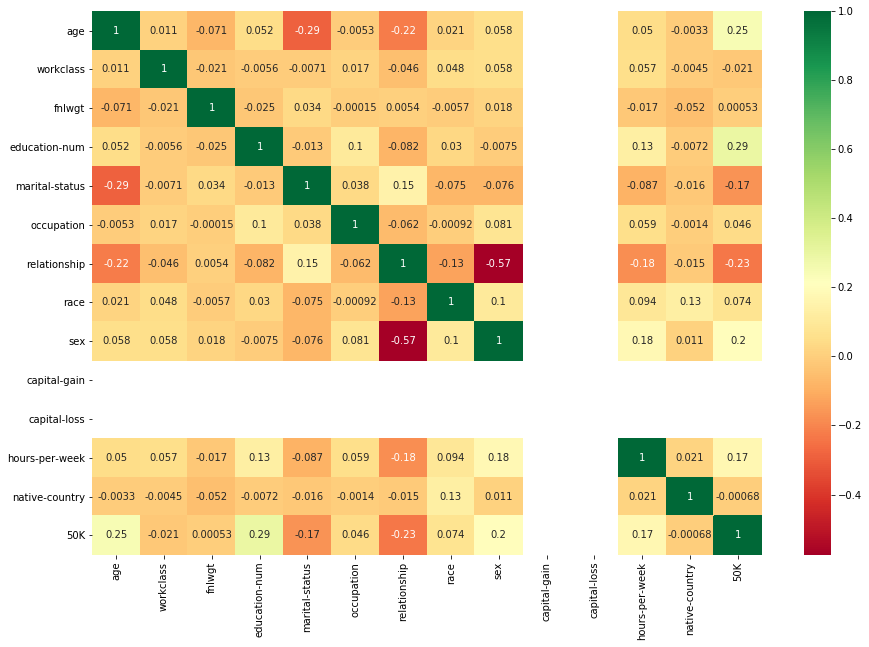

In [82]:
# Correlation of EmpData
plt.figure(figsize=(15,10))
sns.heatmap(data=EmpData.corr(),annot=True,cmap="RdYlGn")

In [83]:
# drop the columns negtively corrleated columns 
EmpData.drop(['fnlwgt','relationship','marital-status','capital-gain','capital-loss'],axis=1,inplace=True)


In [84]:
# drop the education column  which are refernce to education-num
EmpData.drop(['education'],axis=1,inplace=True)

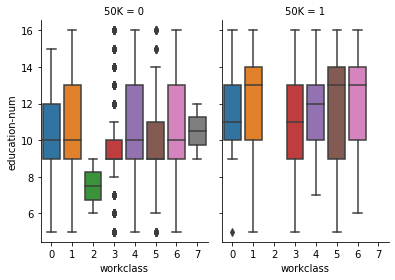

In [85]:
sns.catplot(x="workclass", y="education-num",
               col="50K",
                data=EmpData, kind="box",
                height=4, aspect=.7);

In [86]:
EmpData.skew()

age               0.435155
workclass         0.048003
education-num     0.261112
occupation        0.122000
race             -2.333145
sex              -0.719090
hours-per-week    1.067612
native-country   -4.489270
50K               1.411828
dtype: float64

In [87]:
# Log Trasformation
x=EmpData
x['native-country']=np.log(EmpData['native-country']+1)
x['race']=np.log(EmpData['race']+1)

In [88]:
x

,age,workclass,education-num,occupation,race,sex,hours-per-week,native-country,50K
2,38,3,9,5,1.609438,1,40,3.637586,0
3,53,3,7,5,1.098612,1,40,3.637586,0
4,28,3,13,9,1.098612,0,40,1.609438,0
5,37,3,14,3,1.609438,0,40,3.637586,0
7,52,5,9,3,1.609438,1,45,3.637586,1
...,...,...,...,...,...,...,...,...,...
32554,53,3,14,3,1.609438,1,40,3.637586,1
32555,22,3,10,10,1.609438,1,40,3.637586,0
32556,27,3,12,12,1.609438,0,38,3.637586,0
32557,40,3,9,6,1.609438,1,40,3.637586,1


In [89]:
x=EmpData.drop(['50K'],axis=1)

In [90]:
y=EmpData['50K']
y=np.array(y).reshape(-1,1)

In [91]:
print(x.shape)
print(y.shape)

(18997, 8)
(18997, 1)


In [92]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)
# default random random_state=42


In [93]:
# using maxr2_score function will findout random_state

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

def maxr2_score(regr,x,y):
    max_r_score=0
    final_r_state=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.2)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
#         print("r2 score corresponding to",r_state," is " ,r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state," is ",max_r_score)
    return final_r_state

# Define the Classification Model

In [94]:
# import Libraries 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
sgd=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)


from sklearn.ensemble import RandomForestClassifier
#  Cross Validation Libraries 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

KNN=KNeighborsClassifier(n_neighbors=6)
sv=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()
Rf=RandomForestClassifier(n_estimators = 1000, random_state = 1)
SGD=SGDClassifier(loss='modified_huber',shuffle=True,random_state=101)

In [95]:
models=[]
models.append(("KNeighborsClassifier",KNN))
# models.append(("SVC",sv))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GaussianNB",GNB))
models.append(("SGDClassifier",SGD))
# models.append(("RandomForestClassifier",Rf))


*********** KNeighborsClassifier ************


max r2 score corresponding to 0  is  0


random state value = 0
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=6, p=2,
           weights='uniform')


Accuracy_score=  0.7966507177033493


Cross_Val_Score= 0.8000739886777343


roc_auc_score= 0.6106691146470828


classification_report
               precision    recall  f1-score   support

           0       0.82      0.94      0.88      3268
           1       0.57      0.28      0.38       912

   micro avg       0.80      0.80      0.80      4180
   macro avg       0.70      0.61      0.63      4180
weighted avg       0.77      0.80      0.77      4180



[[3074  194]
 [ 656  256]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********** LogisticRegression ************


max r2 score corresponding to 0  is  0


random state value = 0
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept

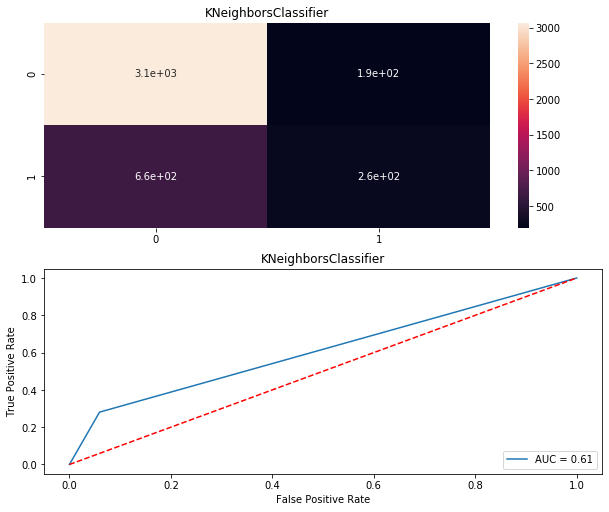

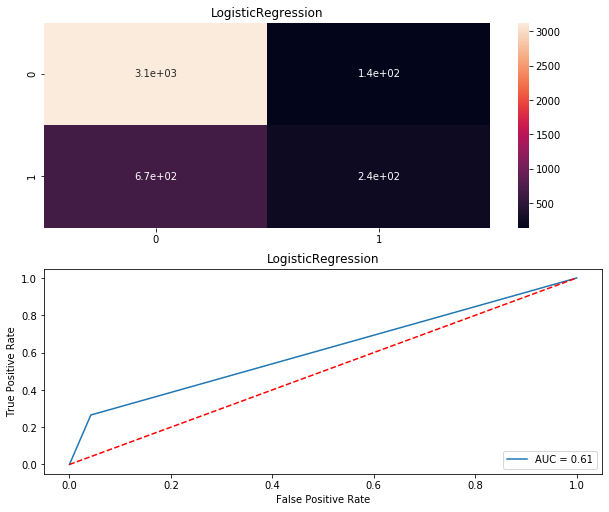

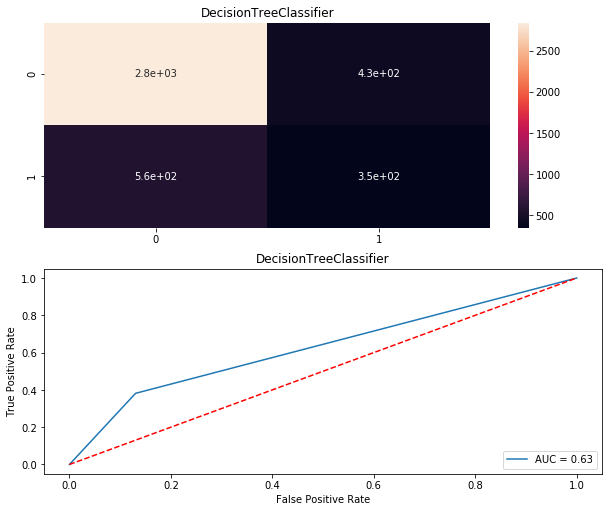

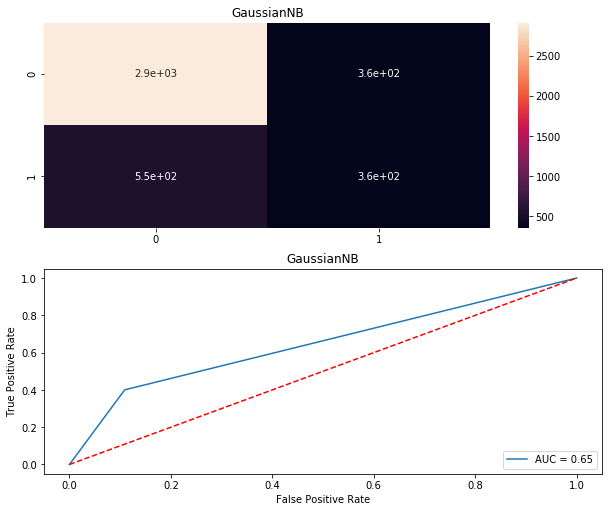

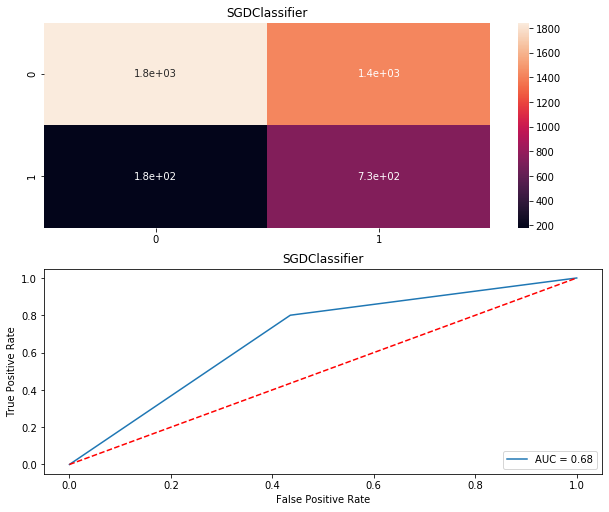

In [96]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc
from sklearn.preprocessing import StandardScaler
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print('***********',name,'************')
    print('\n')
    r_state=maxr2_score(model,x,y)
    print('\n')
    print('random state value =',r_state)
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.22)
    
    
    
    
    
    
    
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score= ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross_Val_Score=',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score=',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')
     


In [97]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_Score':cvs,'ROC_Auc_Curve':rocscore})
result

,Model,Accuracy_score,Cross_val_Score,ROC_Auc_Curve
0,KNeighborsClassifier,79.665072,80.007399,61.066911
1,LogisticRegression,80.669856,81.260269,61.156161
2,DecisionTreeClassifier,76.315789,76.538529,62.561200
3,GaussianNB,78.397129,79.591654,64.564208
4,SGDClassifier,61.602871,77.712451,68.250204


In [98]:
# Ensemble Techquies to boost the performance 
# GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(train_x,train_y)
ad_pred=gb.predict(test_x)
print(accuracy_score(test_y,ad_pred))
print(confusion_matrix(test_y,ad_pred))
print(classification_report(test_y,ad_pred))

0.8275119617224881
[[3145  186]
 [ 535  314]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.90      3331
           1       0.63      0.37      0.47       849

   micro avg       0.83      0.83      0.83      4180
   macro avg       0.74      0.66      0.68      4180
weighted avg       0.81      0.83      0.81      4180



In [99]:
# Saving the Model with MAX Accuracy score value 
from sklearn.externals import joblib
joblib.dump(gb,'Census_Model.obj')
OuModel=joblib.load('Census_Model.obj')


# Conclusion
    Preparing the classification model for data >50K or  <=50K
    we have been handled categorical and numeric null values 
    we have been applied Log Tranformation for Normal Distribution
    GradientBoosting Model has been achived max performance
